# Simulating Asset Returns with Random Walks

## A Stochastic Model for Asset Returns

Below is an example of a stochastic model for a simple case of two assets one risky and one risk free, the values of those assets at a time $t$ is denoted by $S_t$ and $B_t$.

$$
\begin{cases} 
\frac{\mathop{\mathrm{d}S_t}}{S_t} = \underbrace{\left(r+\sigma\lambda \right)}_{=\mu}\mathop{\mathrm{d}t} + \hspace{2pt}\sigma \mathop{\mathrm{d}W_t}\\
\frac{\mathop{\mathrm{d}B_t}}{B_t} = r\mathop{\mathrm{d}t} \Leftrightarrow B_t = B_0e^{rt}
\end{cases}
$$

In the first equation $\frac{\mathop{\mathrm{d}S_t}}{S_t}$ is the percentage return of the risky asset over an infintesmal time period, $r$ is the risk-free rate, $\sigma$ is the volatility of the risky asset, $\lambda$ is the sharpe ratio, $\mathop{\mathrm{d}t}$ is the time interval of interest and $\mathop{\mathrm{d}W_t}$ is the standard brownian motion process equivalent to a random walk in continuous-time. The first component on the rhs of equation one is the expected return of the risky asset denoted as $\mu$. The second equation simply corresponds to the risk-free asset where there is only a deterministic compononent and no random walk, implying that the return is purely predictable.

## Brownian Motion

The browninan motion process essentially looks like some kind of noise or random walk, something that goes up and down in a very stochastic and predictable manner. This process was first introduced by a French mathematician named Louis Bachelier in 1900 who was actually trying to do option pricing as part of his mathematics PhD. Brownian motion was then re-discovered independently by Albert Einstein and was the basis of one of his papers in the 1905 miracle year showing the existance of molecules.

### Discrete Time Formulation

It is perhaps easier to think about brownian motion in the discrete time formulation which tries to make it explicit. 

$$\frac{S_{t+\mathop{\mathrm{d}t}}-S_t}{S_t} = \left(r+\sigma\lambda\right)\mathop{\mathrm{d}t}+\hspace{2pt}\sigma\sqrt{\mathop{\mathrm{d}t}}\hspace{2pt} \xi_t$$

This is essentially the same as the previous equation where we have the percentage return equal to the expected return plus the volatility multiplied by the brownian process. The size of the brownian motion is defined in terms of random variables mean and unit variance.

$$ 
\mathbf{E_t}\left[\frac{\mathop{\mathrm{d}S_t}}{S_t}\right] = \mu \mathop{\mathrm{d}t} \Rightarrow \frac{\mathbf{E_t}\left[\frac{\mathop{\mathrm{d}S_t}}{S_t}\right]}{\mathop{\mathrm{d}t}} = \mu
$$

$$
\mathbf{{Var}_t}\left[\frac{\mathop{\mathrm{d}S_t}}{S_t}\right] = \sigma^2 \mathop{\mathrm{d}t} \Rightarrow \frac{\mathbf{{Var}_t}\left[\frac{\mathop{\mathrm{d}S_t}}{S_t}\right]}{\mathop{\mathrm{d}t}} = \sigma^2
$$

So essentially brownian motion follows a normal distribution with zero mean and variance $\mathop{\mathrm{d}t}$, $\mu$ is the annualised expected return and $\sigma$ is the anualised volatility.

## Monte Carlo Simulation

### A Model with a Stochastic Opportunity Set

In reality everything is time varying, so we may consider a more general model.

$$ 
\frac{\mathop{\mathrm{d}S_t}}{S_t} = \left(r_t + \underbrace{\sqrt{V_t}}_{=\sigma_t}\hspace{3pt}\lambda^{S}_t\right)\mathop{\mathrm{d}t} + \hspace{2pt} \underbrace{\sqrt{V_t}}_{=\sigma_t} \hspace{2pt} \mathop{\mathrm{d}W^{S}_{t}}
$$

In this model the risk-free rate, variance and sharpe ratio are now all time varying parameters. Now due to this we must also introduce stochastic processes for all these new time varying parameters:

$$
\mathop{\mathrm{d}r_t} = a\left(b-r_t\right)\mathop{\mathrm{d}t} + \hspace{2pt}\sigma_r\mathop{\mathrm{d}W^{r}_{t}}
$$

$$
\mathop{\mathrm{d}V_t} = \alpha\left(\bar{V}-V_t\right)\mathop{\mathrm{d}t} + \hspace{2pt}\sigma_V\sqrt{V_t}\mathop{\mathrm{d}W^{V}_{t}}
$$

The first equation shows the evolution of the risk-free rate with respect to time. The first component on the rhs is a deterministic mean reverting element where $a$ is the speed of mean reversion multiplied by $(b-r_t)$ where $b$ is the long-term mean of the process. The second component is the brownian motion driving the uncertainty.

The second equation, which is for variance, is more or less the same as the first. However, there is a slight modifcation because as we get close tono variance the brownian pertubation could take us into a negative variance. To counter this, we introuce a square root of variance before the brownian pertubation so as we reach no variance the brownian pertubation goes away. All of these processes that we have introduced are called mean reverting processes, because they reflect the fact that in the real world, interest rates, volatility and sharpe ratios tend to be positive.

In conclusion, asset returns are often assumed to follow a random walk if we assume that the returns are normally distributed, with zero serial correlation and a variance proportional to time. We can use the brownian motion process to construct more complex asset return models with time varying parameters.

# Lab Session - Random Walks and Monte Carlo

### Random Walk Generation

$$\frac{S_{t+\mathop{\mathrm{d}t}}-S_t}{S_t} = \left(r+\sigma\lambda\right)\mathop{\mathrm{d}t}+\hspace{2pt}\sigma\sqrt{\mathop{\mathrm{d}t}}\hspace{2pt} \xi_t$$

In [2]:
import pandas as pd
import numpy as np
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2

In [3]:
def gbm(n_years = 10, n_scenarios = 1000, mu = 0.07, sigma = 0.15, steps_per_year = 12, s_0 = 100):
    '''
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    '''
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year)
    xi = np.random.normal(size = (n_steps, n_scenarios))
    rets = mu * dt + sigma * np.sqrt(dt) * xi
    rets = pd.DataFrame(rets)
    # to prices
    prices = s_0*(1 + rets).cumprod()
    return prices

In [4]:
p = gbm(10, 3)

In [5]:
p.shape

(120, 3)

In [6]:
p.head()

,0,1,2
0,100.616609,104.631304,100.756981
1,96.885888,99.015958,100.381530
2,100.232417,96.871423,98.884992
3,90.489600,97.927214,104.319819
4,94.535005,99.537030,105.809071


<AxesSubplot:>

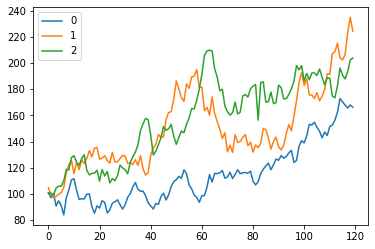

In [7]:
p.plot()

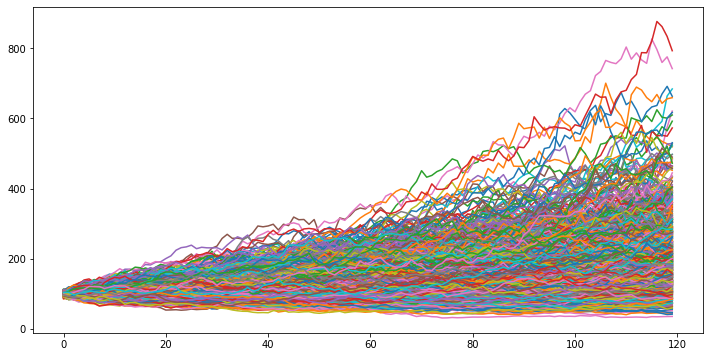

In [9]:
p = gbm(n_years = 10, n_scenarios = 1000).plot(figsize=(12, 6), legend = False)

In [10]:
p = gbm(n_years = 10, n_scenarios = 1000)

In [11]:
def gbm0(n_years = 10, n_scenarios = 1000, mu = 0.07, sigma = 0.15, steps_per_year = 12, s_0 = 100):
    '''
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    '''
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year)
    xi = np.random.normal(size = (n_steps, n_scenarios))
    rets = mu * dt + sigma * np.sqrt(dt) * xi
    rets = pd.DataFrame(rets)
    # to prices
    prices = s_0*(1 + rets).cumprod()
    return prices

def gbm1(n_years = 10, n_scenarios = 1000, mu = 0.07, sigma = 0.15, steps_per_year = 12, s_0 = 100):
    '''
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    '''
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year)
    rets_plus_1 = np.random.normal(loc = 1 + mu * dt, scale = sigma * np.sqrt(dt), size = (n_steps, n_scenarios))
    # to prices
    prices = s_0 * pd.DataFrame((rets_plus_1)).cumprod()
    return prices

In [12]:
%timeit gbm0(n_years=5, n_scenarios=1000)

1.29 ms ± 8.81 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [13]:
%timeit gbm1(n_years=5, n_scenarios=1000)

1.2 ms ± 1.74 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [14]:
def gbm(n_years = 10, n_scenarios = 1000, mu = 0.07, sigma = 0.15, steps_per_year = 12, s_0 = 100):
    '''
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    '''
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year)
    rets_plus_1 = np.random.normal(loc = 1 + mu * dt, scale = sigma * np.sqrt(dt), size = (n_steps, n_scenarios))
    # to prices
    prices = s_0 * pd.DataFrame((rets_plus_1)).cumprod()
    return prices

<AxesSubplot:>

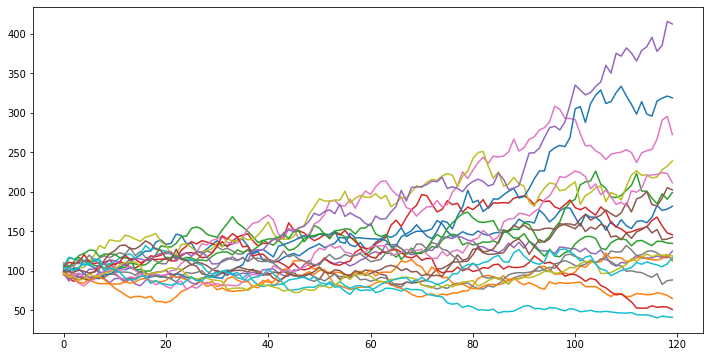

In [16]:
gbm(n_years = 10, n_scenarios = 20).plot(figsize = (12, 6), legend = False)

In [17]:
def gbm(n_years = 10, n_scenarios = 1000, mu = 0.07, sigma = 0.15, steps_per_year = 12, s_0 = 100):
    '''
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    '''
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year)
    rets_plus_1 = np.random.normal(loc = 1 + mu * dt, scale = sigma * np.sqrt(dt), size = (n_steps, n_scenarios))
    rets_plus_1[0] = 1
    # to prices
    prices = s_0 * pd.DataFrame((rets_plus_1)).cumprod()
    return prices

<AxesSubplot:>

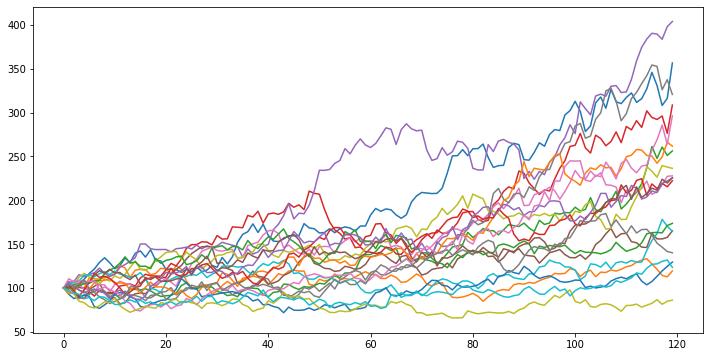

In [18]:
gbm(n_years = 10, n_scenarios = 20).plot(figsize = (12, 6), legend = False)

In [19]:
gbm(n_scenarios=10).head()

,0,1,2,3,4,5,6,7,8,9
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,97.400821,96.835558,110.559936,101.350457,109.535202,97.397641,103.893324,97.972800,95.527295,105.539869
2,99.284865,105.160381,113.343580,102.828863,117.232048,104.490676,108.888996,95.773933,100.865549,98.410654
3,98.937770,107.119308,110.596186,107.694067,119.471071,97.512645,113.689038,91.275699,101.052568,97.130109
4,104.602154,101.047663,110.266259,110.327592,114.751788,99.806722,105.409777,90.980320,102.132541,105.054784
